Cel: Analiza wpływu migracji na rynek pracy
* Ocena korelacji pomiędzy poziomem migracji a wskaźnikami zatrudnienia, bezrobocia oraz zatrudnienia w poszczególnych sektorach
* Stworzenie modeli statystycznych oceniających wpływ 
* Wykorzystane zestawy danych z Eurostatu:
    - Employment by citizenship
    - Unemployment by citizenship
    - Employment rates by sex, age and citizenship
    - Unemployment rates by sex, age and citizenship
    - Employment by sex, age and economic activity

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Employment rates by sex, age and citizenship

W analizie biorę pod uwagę: 
* citizenship jako Reporting country/Foreign country/Total
* age -> jedynie 15-64 (w statystyce porównawczej te granice są najczęściej przyjmowane)
* sex -> Females/Males/Total

Wskaźnik zatrudnienia – wskaźnik określający, jaki odsetek ludności w wieku produkcyjnym pracuje zawodowo (jednostka: %)

### Wstępna anliza danych 

In [2]:
e_rate_df = pd.read_csv('../processed_data/employmnet_rates.csv')

In [3]:
selected_countries = ["Poland", "Bulgaria", "Romania", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain"]
df = e_rate_df[e_rate_df['geo'].isin(selected_countries)]

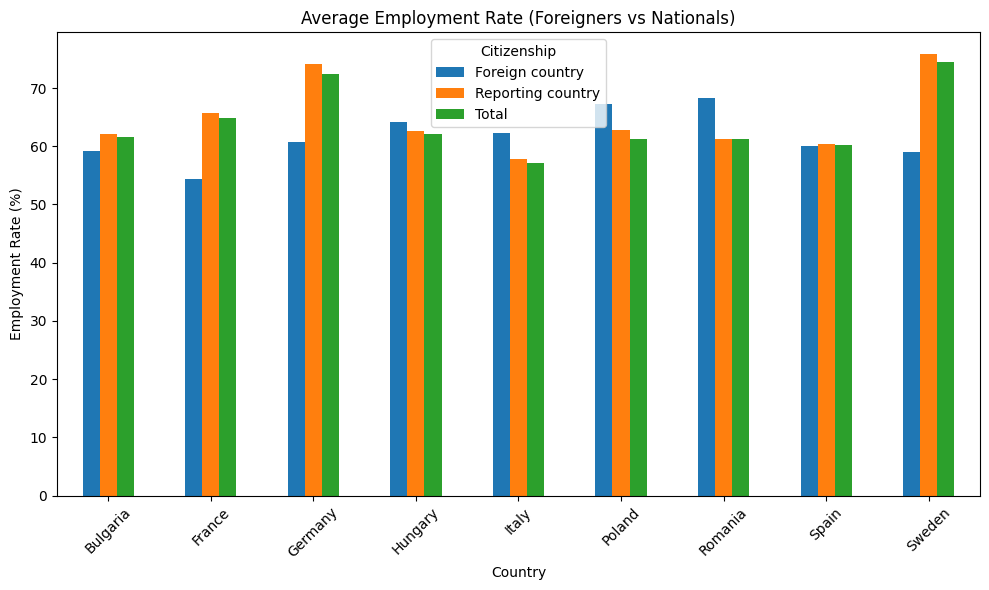

<Figure size 1200x600 with 0 Axes>

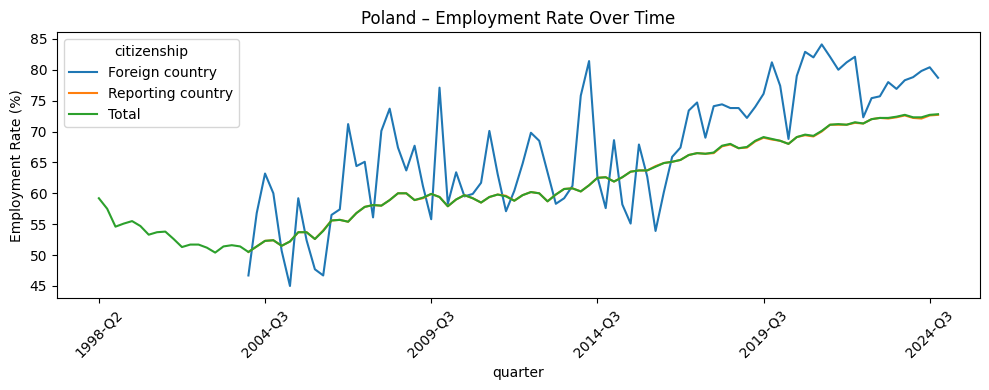

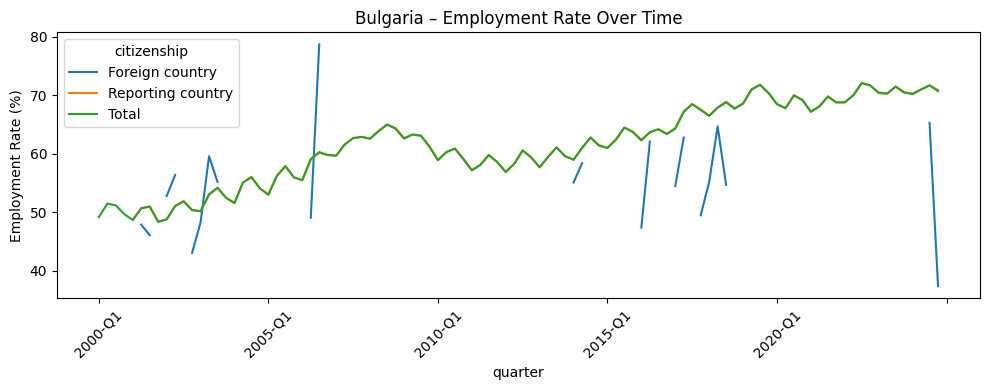

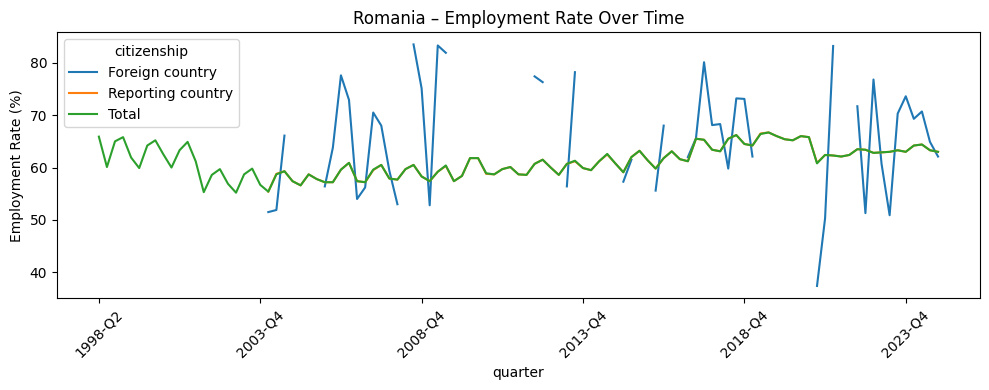

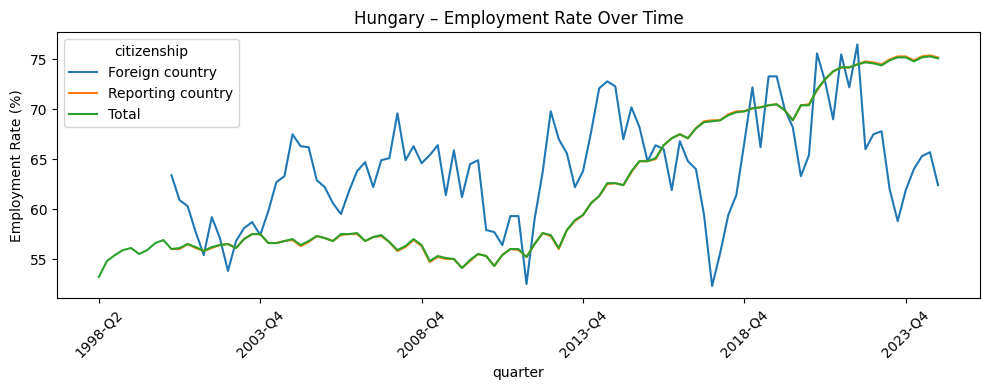

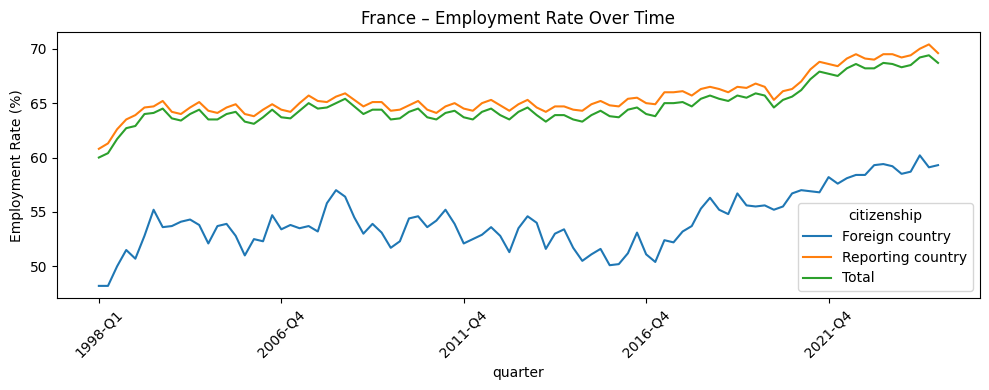

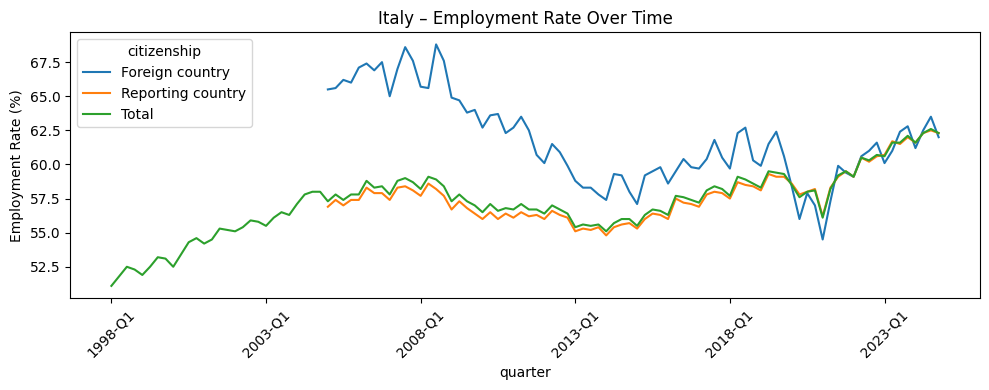

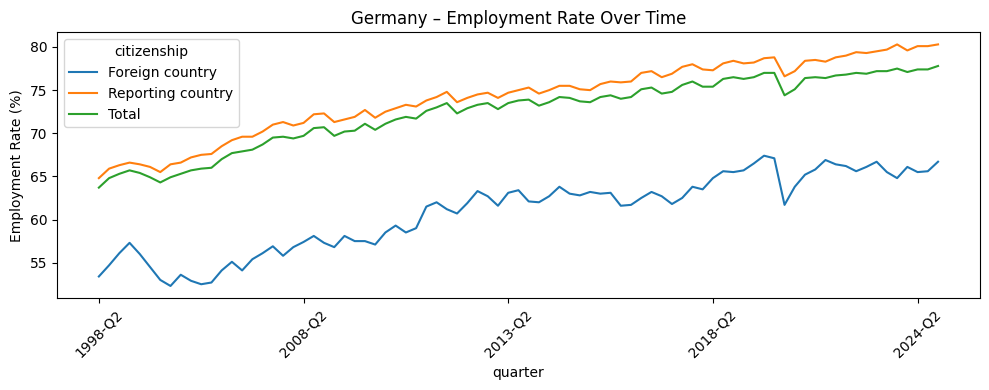

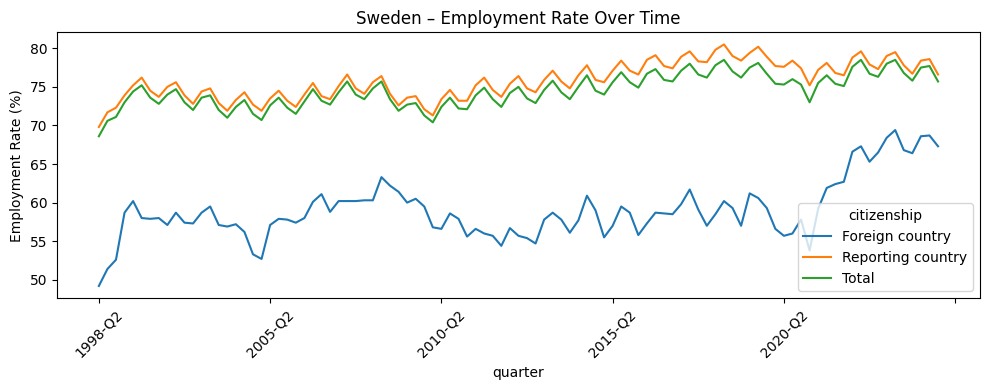

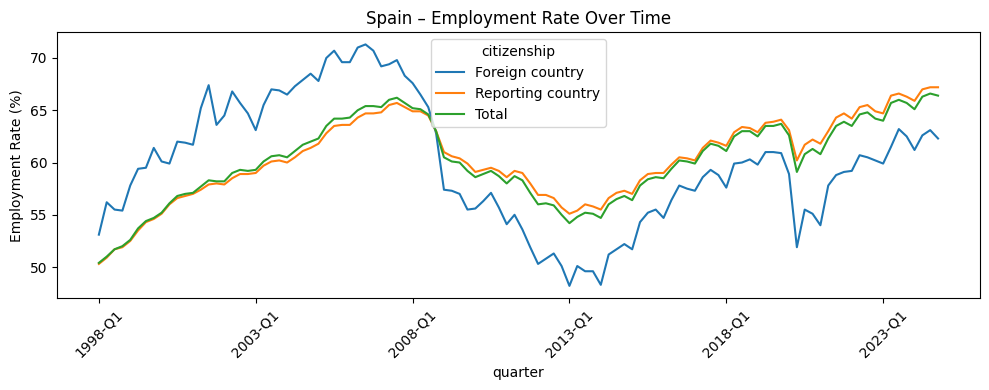

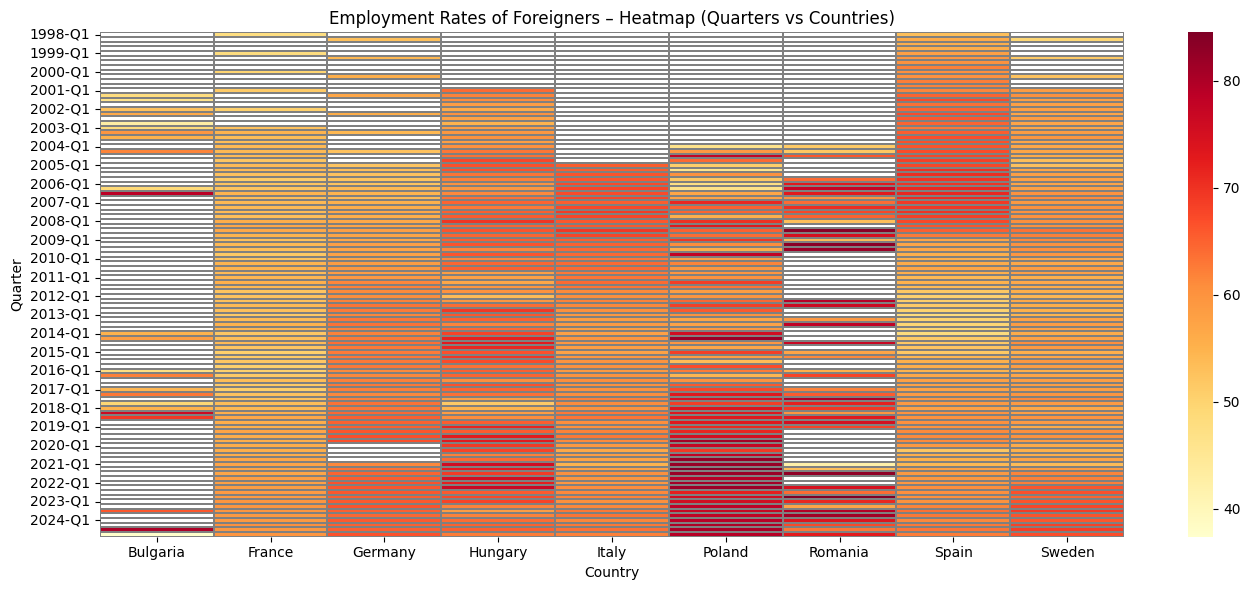

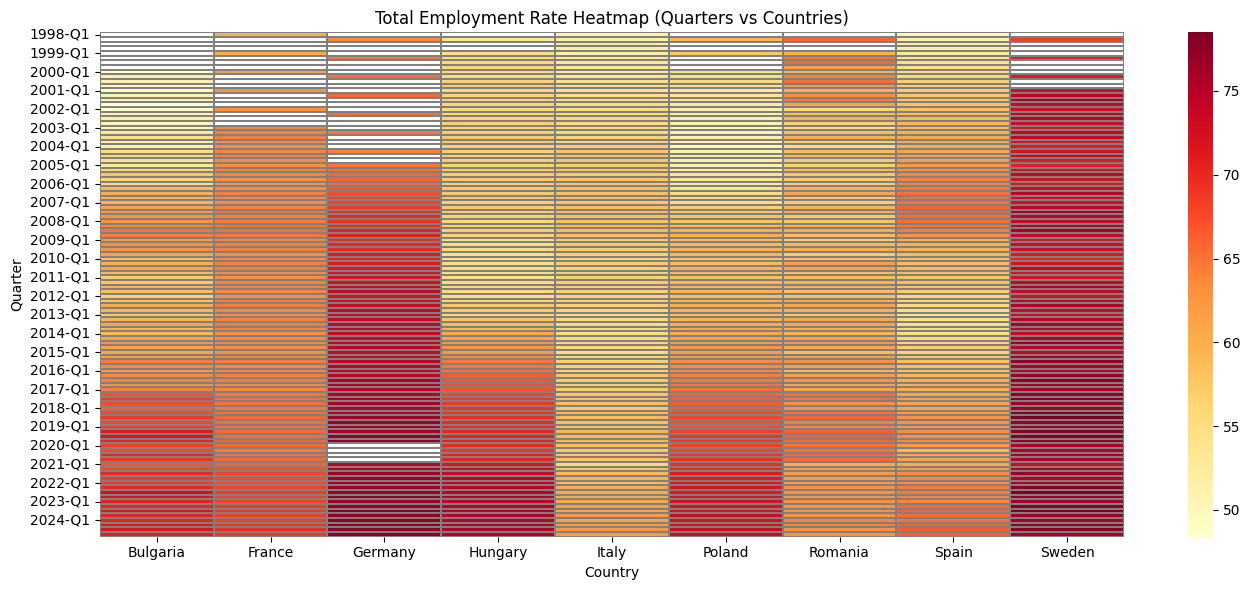

In [4]:
# Average employment rate by citizenship and country
pivot_mean = df.groupby(['geo', 'citizenship'])['employment_rate'].mean().unstack()

pivot_mean.plot(kind='bar', figsize=(10,6))
plt.title("Average Employment Rate (Foreigners vs Nationals)")
plt.ylabel("Employment Rate (%)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Citizenship")
plt.tight_layout()
plt.show()

# Trends over time – for each selected country
plt.figure(figsize=(12,6))
for country in selected_countries:
    subset = df[(df['geo'] == country) & (df['citizenship'].isin(['Reporting country', 'Foreign country', 'Total']) & (df['Sex'] == 'Total'))]
    subset = subset.pivot_table(index='quarter', columns='citizenship', values='employment_rate')
    subset.plot(title=f"{country} – Employment Rate Over Time", figsize=(10,4))
    plt.ylabel("Employment Rate (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Heatmap of foreigner employment rates by country and quarter
heatmap_data = df[df['citizenship'] == 'Foreign country'].pivot_table(index='quarter', columns='geo', values='employment_rate')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Employment Rates of Foreigners – Heatmap (Quarters vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


# Heatmap of total employment rates by country and quarter
heatmap_data = df[df['citizenship'] == 'Total'].pivot_table(index='quarter', columns='geo', values='employment_rate')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Total Employment Rate Heatmap (Quarters vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


Widać znaczny wzrost wskaźnika zatrudnienia w Polsce na przestrzeni lat

Widać braki w danych dla niektórych krajów - Bługarię i Rumunię należy wykluczyć z tej analizy / zastąpić innymi krajami / samodzielnie wyliczyć employment rate (z danych dotyczących employment). Postanowiono sprawdzić Grecję i Słowenię. 

Postanowiono zakres dat ograniczyć do 2005-teraźniejszość

W przypadku Niemiec - zignorowano braki dla 4 kwartałów (mało)

In [5]:
new_countries = ['Greece', 'Slovenia']
# Filter the DataFrame for the new countries
df_extra_countries = e_rate_df[e_rate_df['geo'].isin(new_countries)]


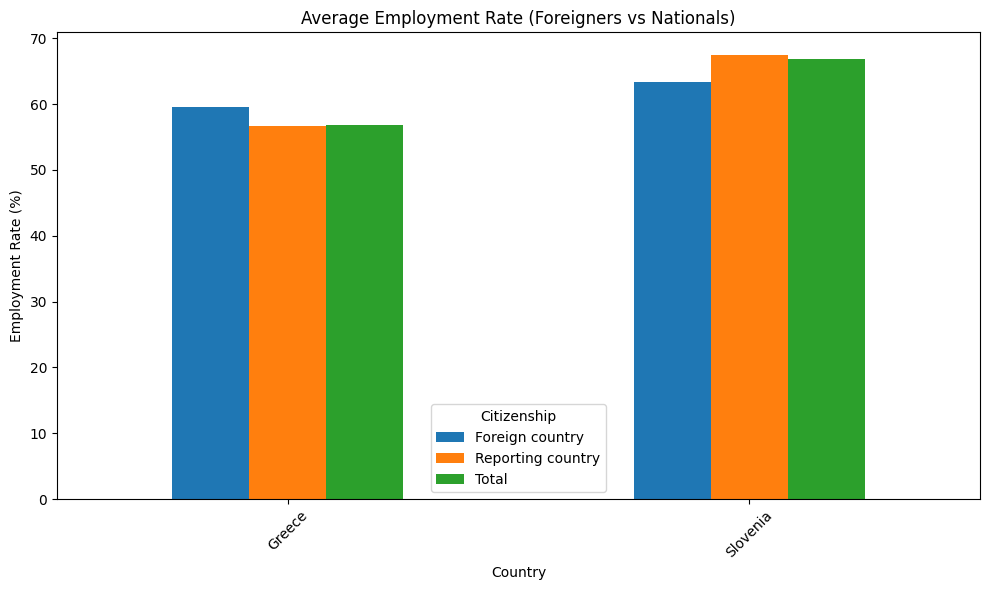

<Figure size 1200x600 with 0 Axes>

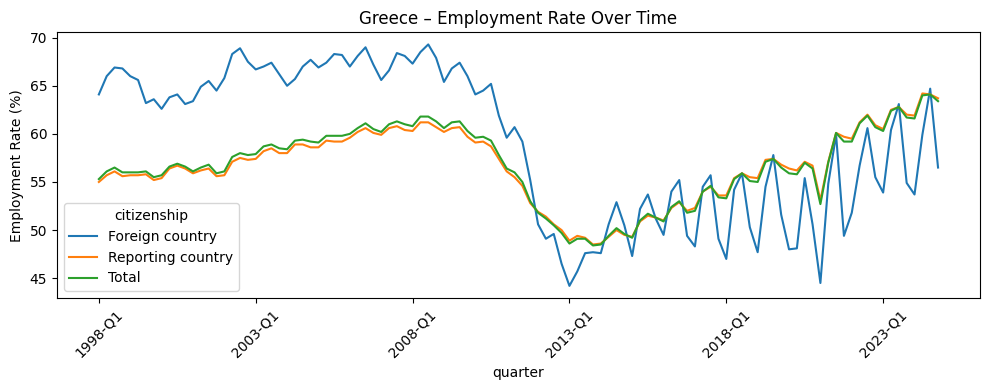

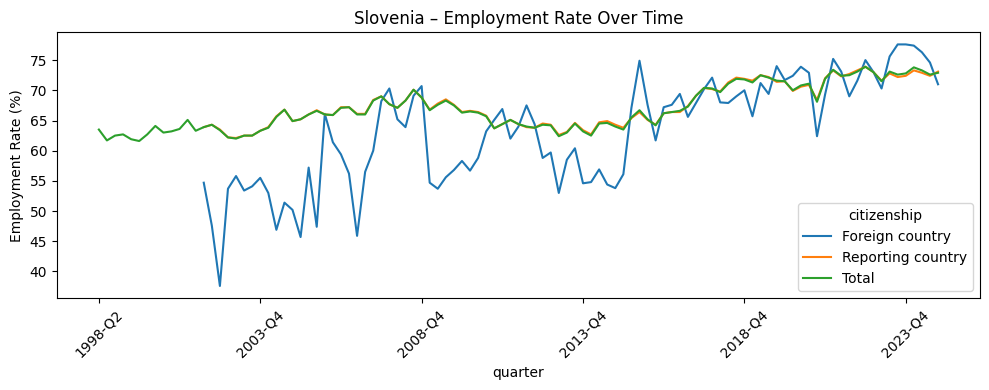

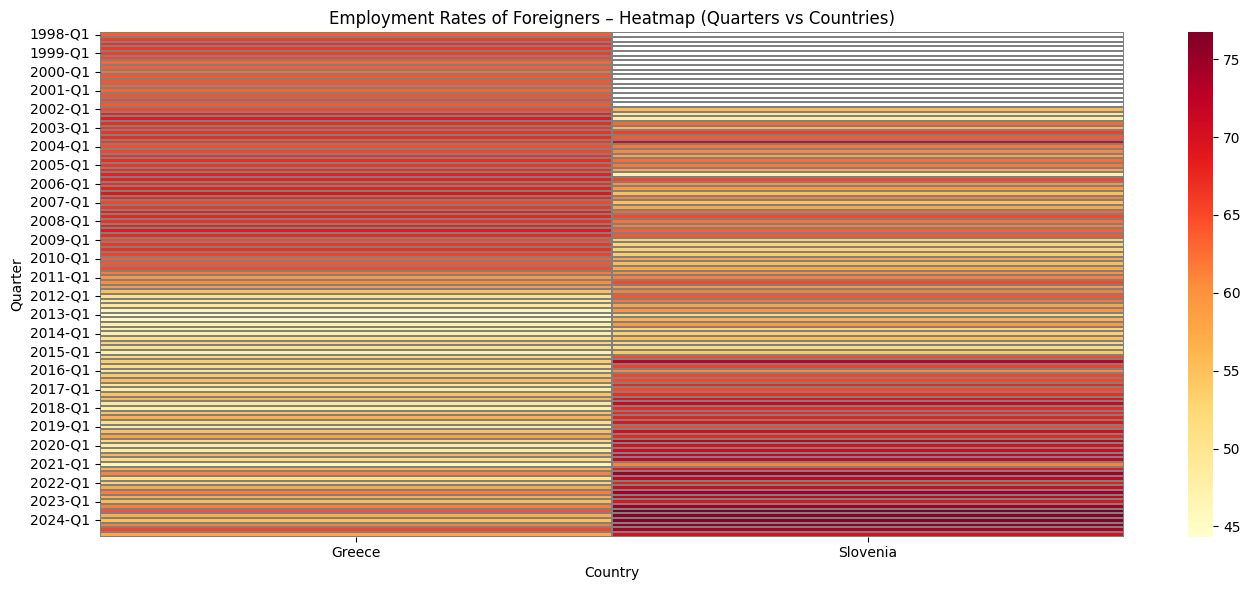

In [6]:
# Average employment rate by citizenship and country
pivot_mean = df_extra_countries.groupby(['geo', 'citizenship'])['employment_rate'].mean().unstack()

pivot_mean.plot(kind='bar', figsize=(10,6))
plt.title("Average Employment Rate (Foreigners vs Nationals)")
plt.ylabel("Employment Rate (%)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Citizenship")
plt.tight_layout()
plt.show()

# Trends over time – for each selected country
plt.figure(figsize=(12,6))
for country in new_countries:
    subset = df_extra_countries[(df_extra_countries['geo'] == country) & (df_extra_countries['citizenship'].isin(['Reporting country', 'Foreign country', 'Total'])) & (df_extra_countries['Sex'] == 'Total')]
    subset = subset.pivot_table(index='quarter', columns='citizenship', values='employment_rate')
    subset.plot(title=f"{country} – Employment Rate Over Time", figsize=(10,4))
    plt.ylabel("Employment Rate (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Heatmap of foreigner employment rates by country and quarter
heatmap_data = df_extra_countries[df_extra_countries['citizenship'] == 'Foreign country'].pivot_table(index='quarter', columns='geo', values='employment_rate')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.astype(float), cmap="YlOrRd", linewidths=0.2, linecolor='gray')
plt.title("Employment Rates of Foreigners – Heatmap (Quarters vs Countries)")
plt.ylabel("Quarter")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

### Analiza związana z płcią


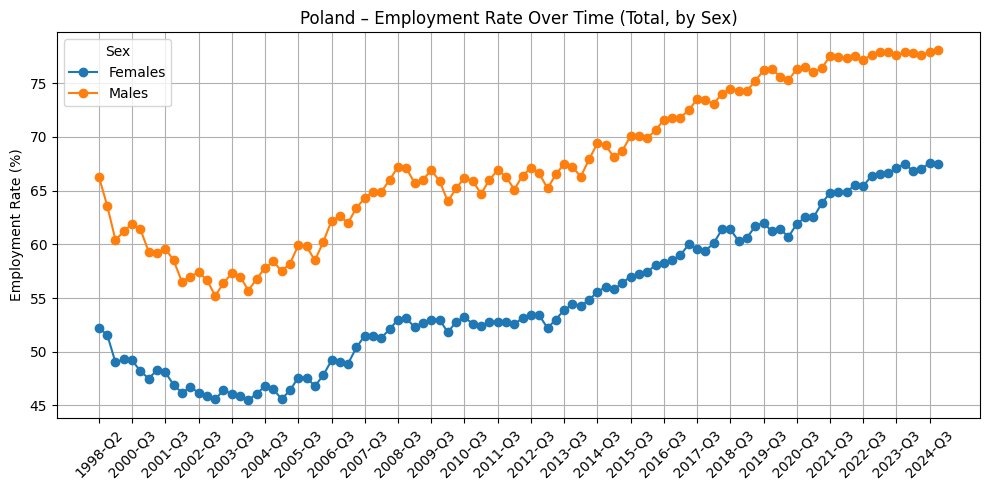

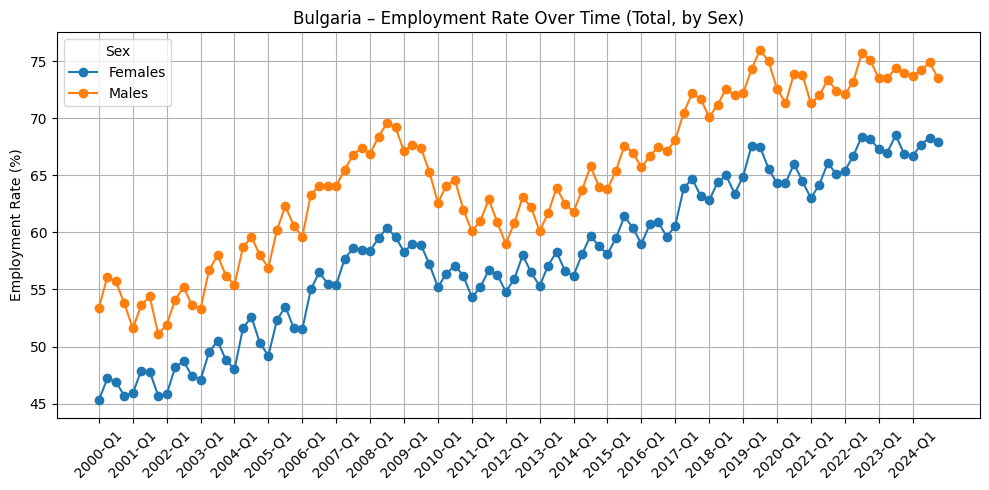

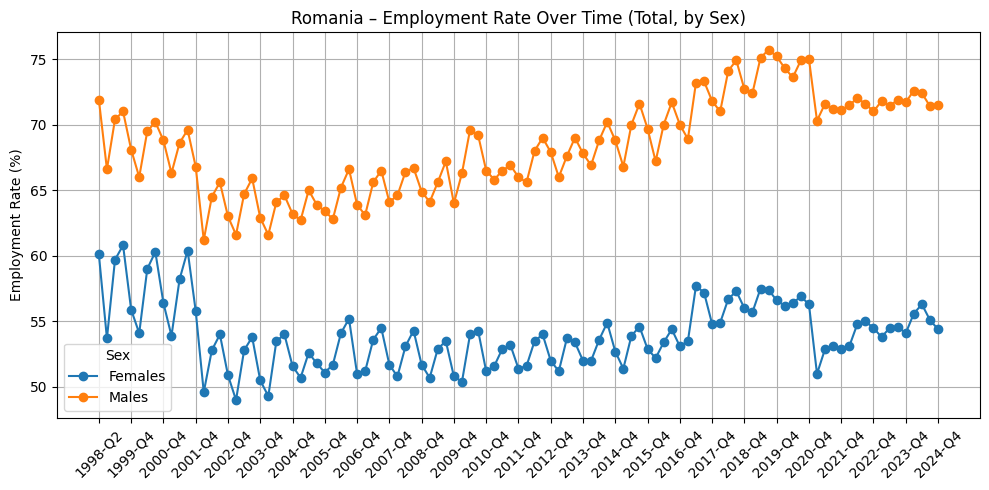

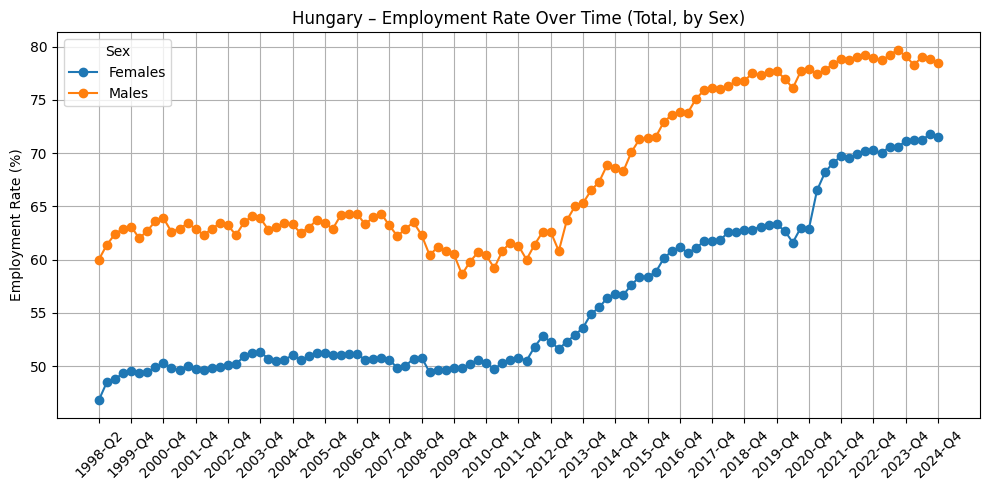

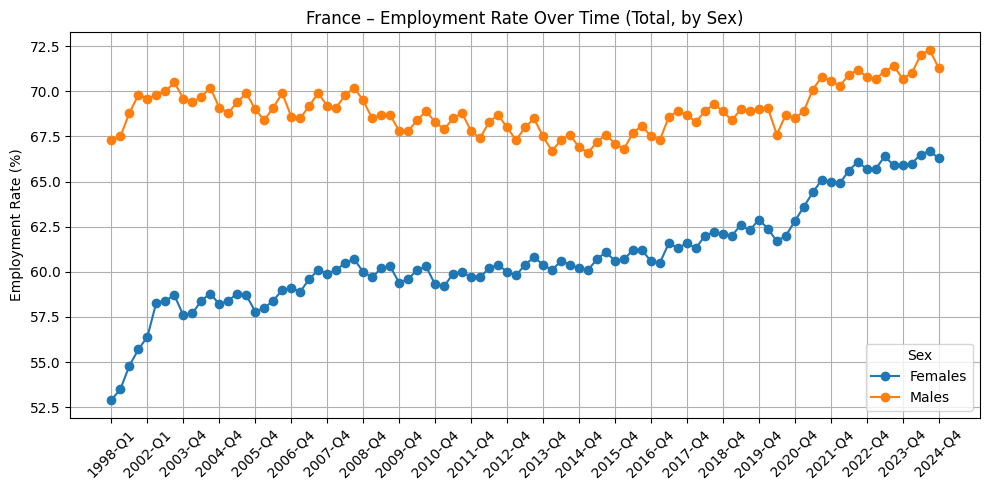

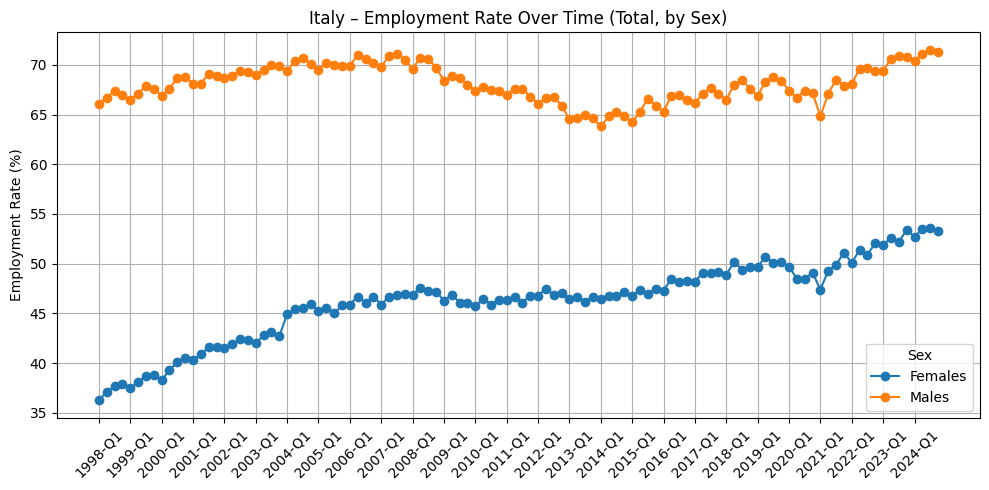

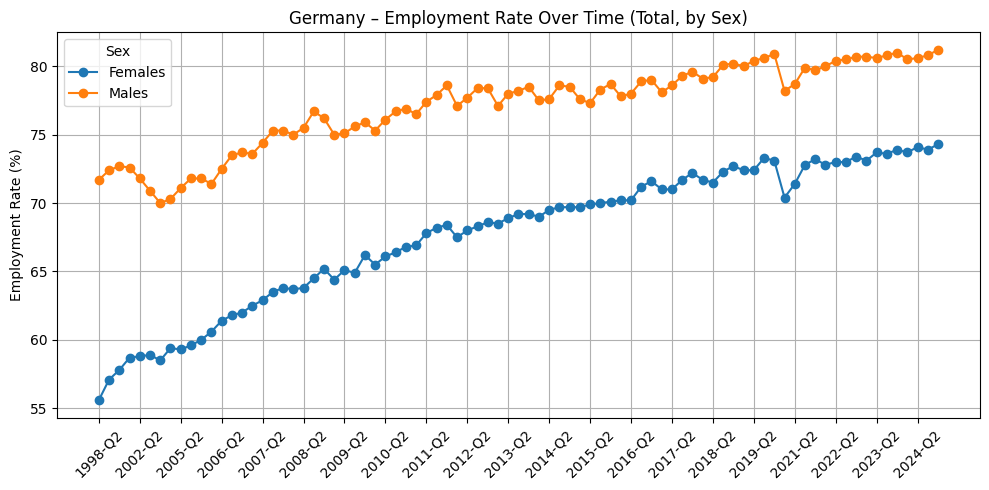

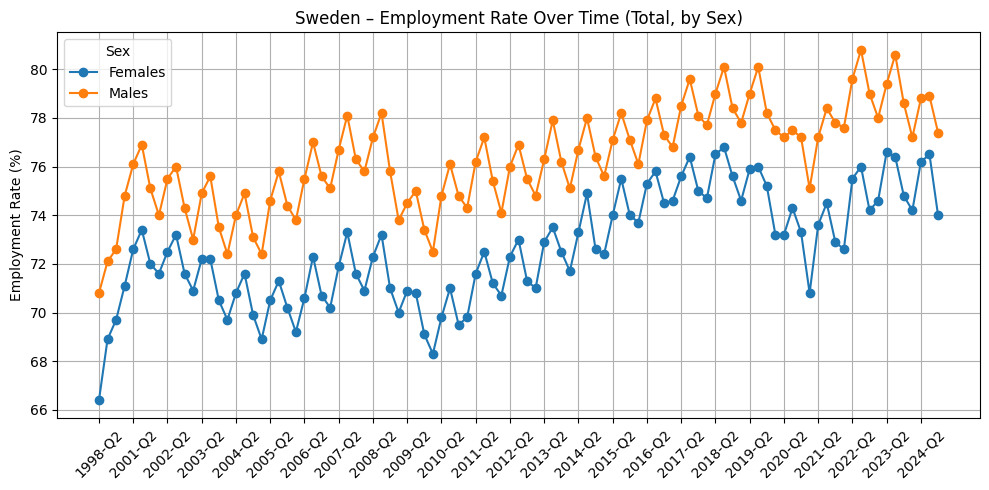

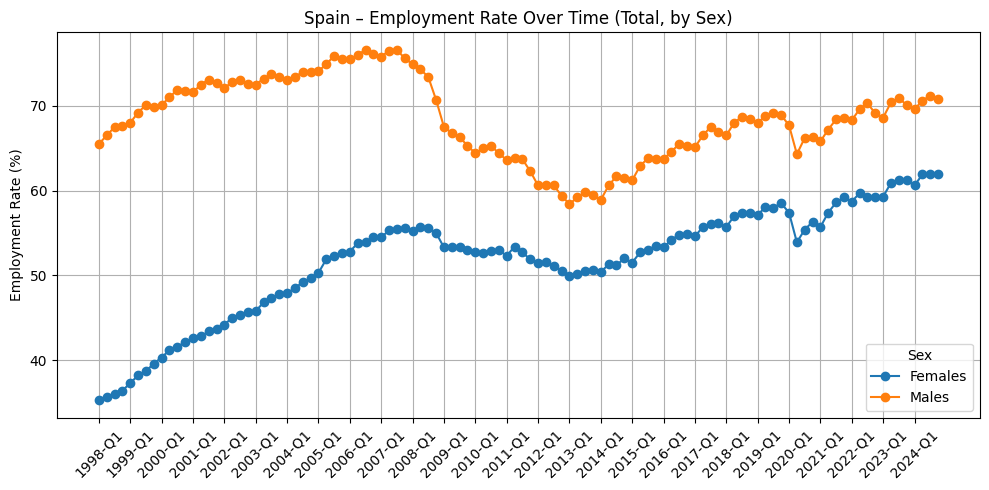

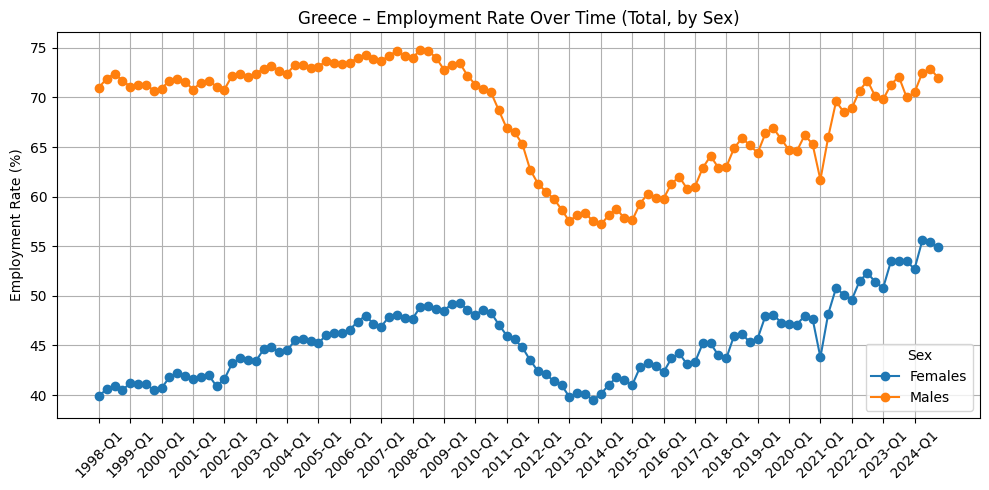

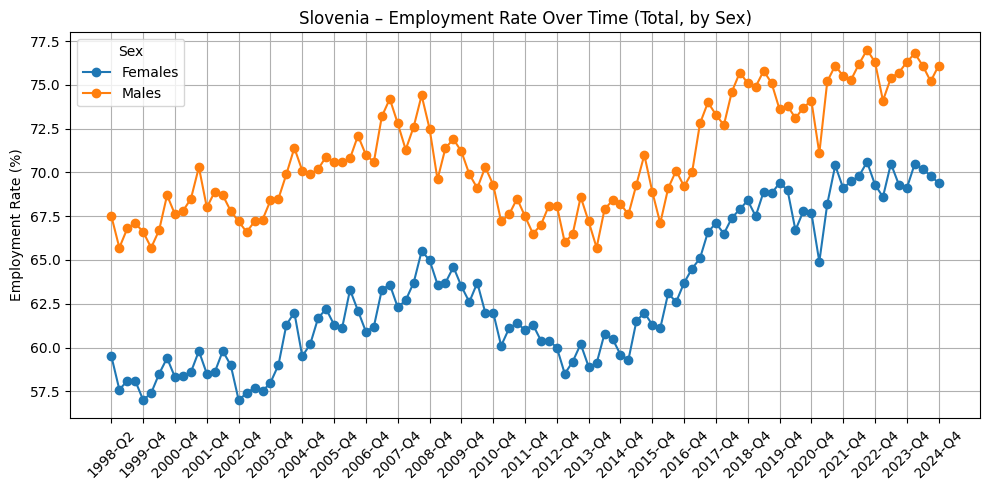

In [18]:
selected_countries = ["Poland", "Bulgaria", "Romania", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain", "Greece", "Slovenia"]

df = e_rate_df[
    (e_rate_df['geo'].isin(selected_countries)) &
    (e_rate_df['Sex'].isin(['Females', 'Males'])) &
    (e_rate_df['citizenship'] == 'Total')
]

for country in selected_countries:
    subset = df[df['geo'] == country].sort_values(by='quarter')

    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    for sex in ['Females', 'Males']:
        sex_data = subset[subset['Sex'] == sex]
        if not sex_data.empty:
            plt.plot(sex_data['quarter'], sex_data['employment_rate'], marker='o', label=sex)

    plt.title(f"{country} – Employment Rate Over Time (Total, by Sex)")
    plt.ylabel("Employment Rate (%)")


    xticks = subset['quarter'].sort_values().unique()
    plt.xticks(xticks[::4], rotation=45)

    plt.grid(True)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()


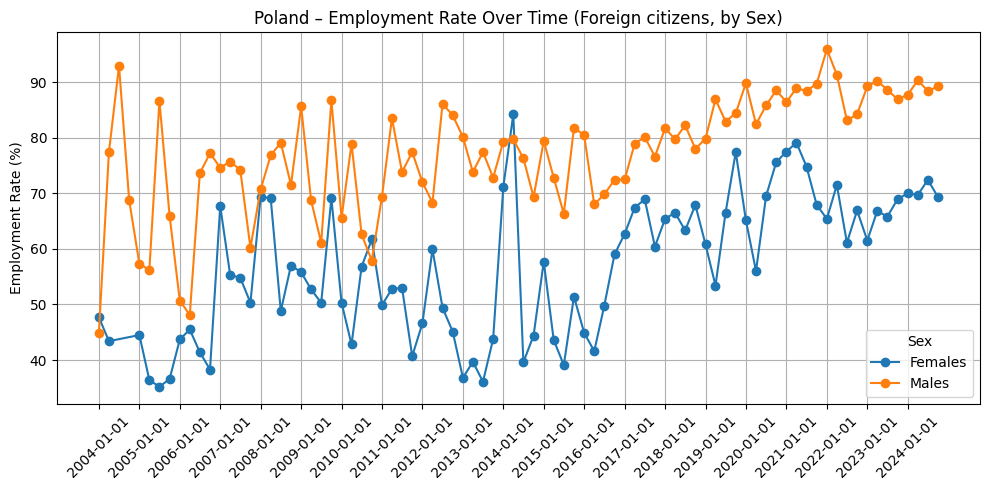

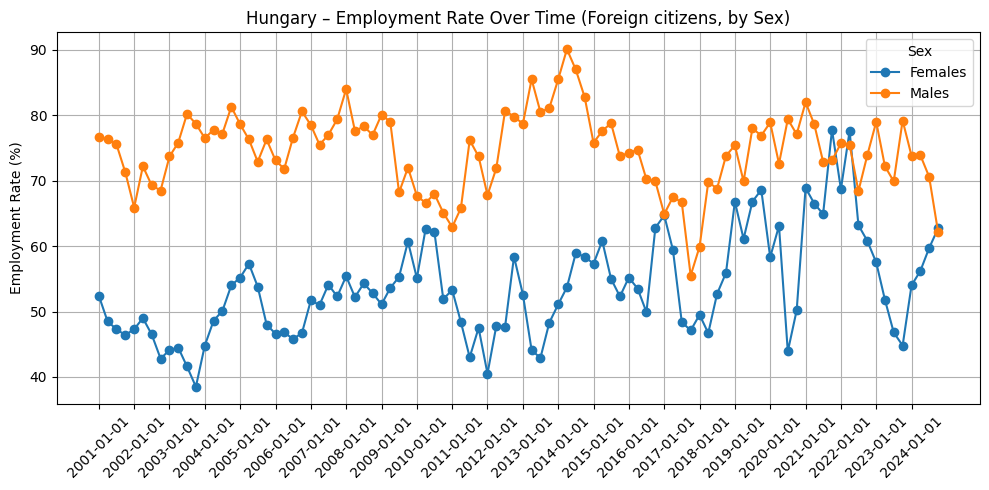

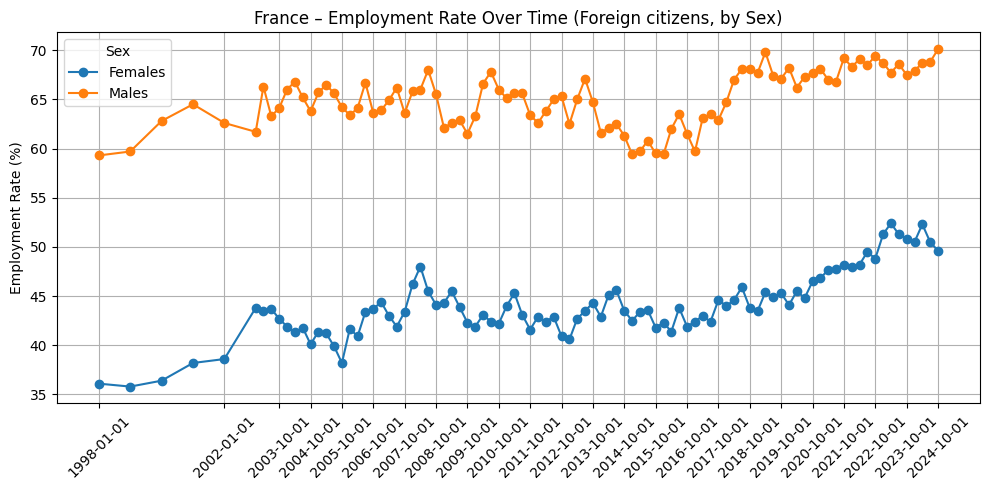

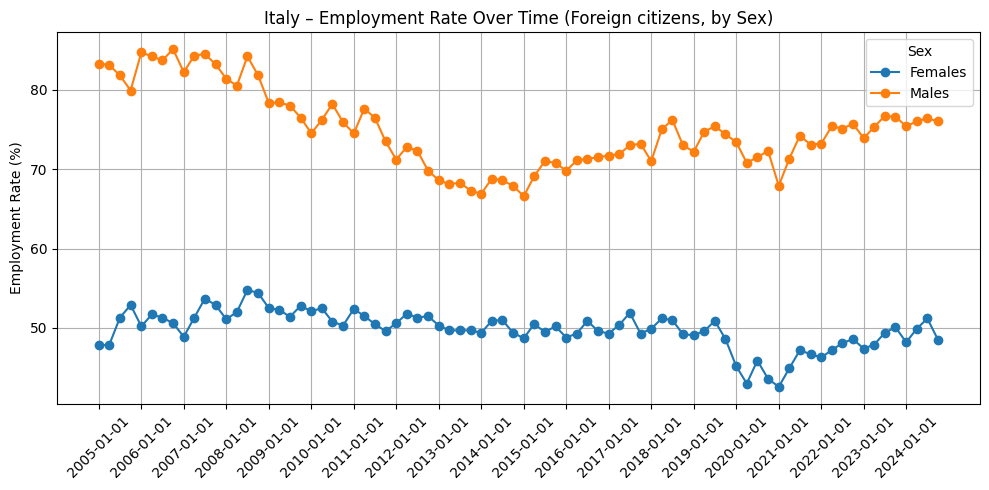

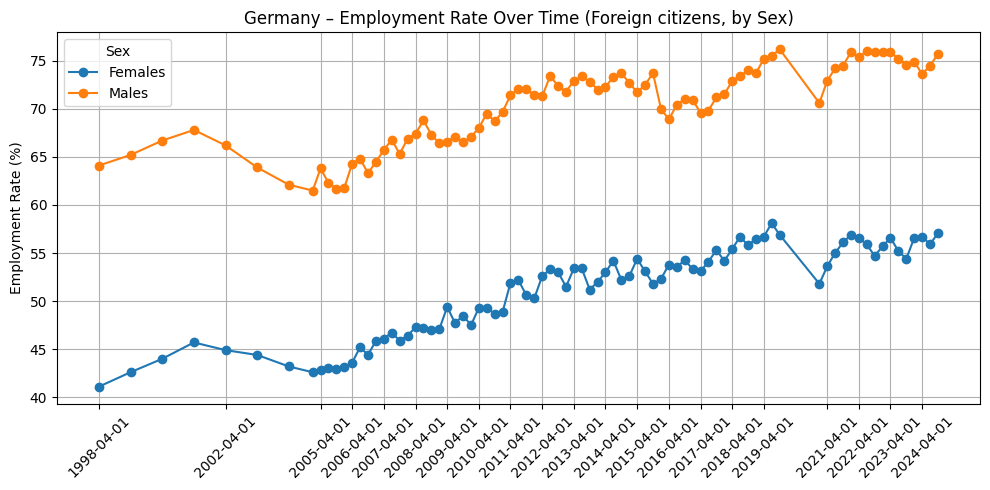

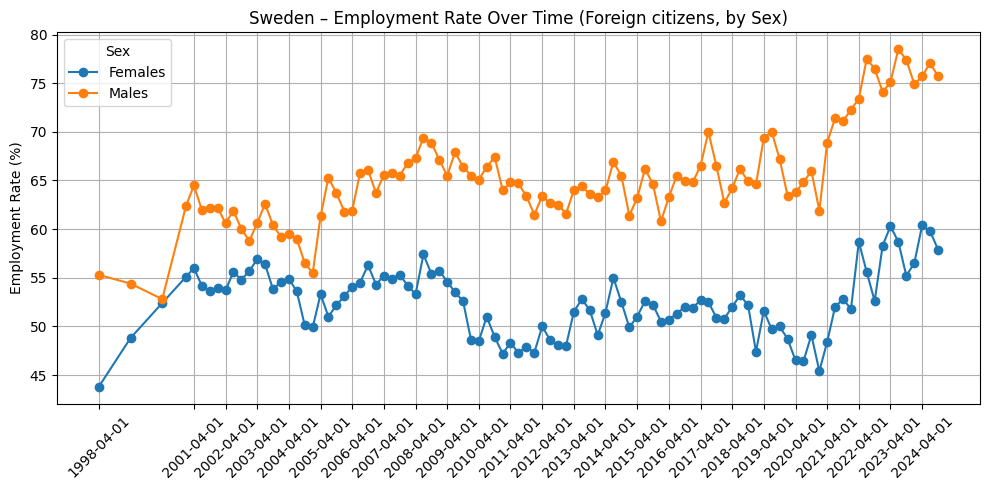

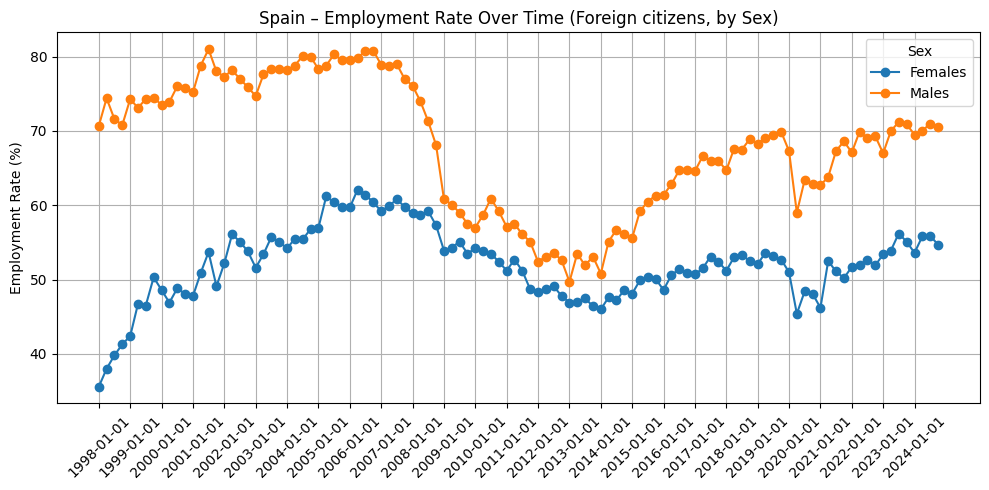

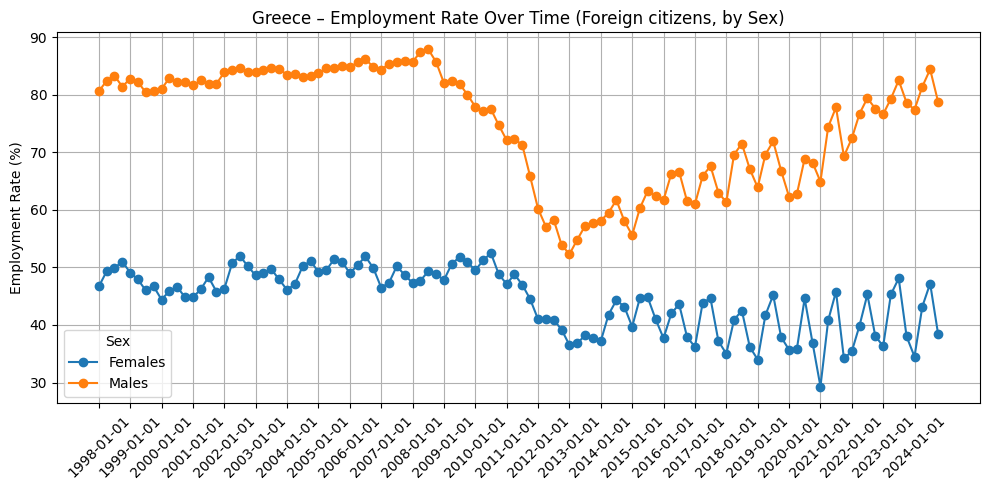

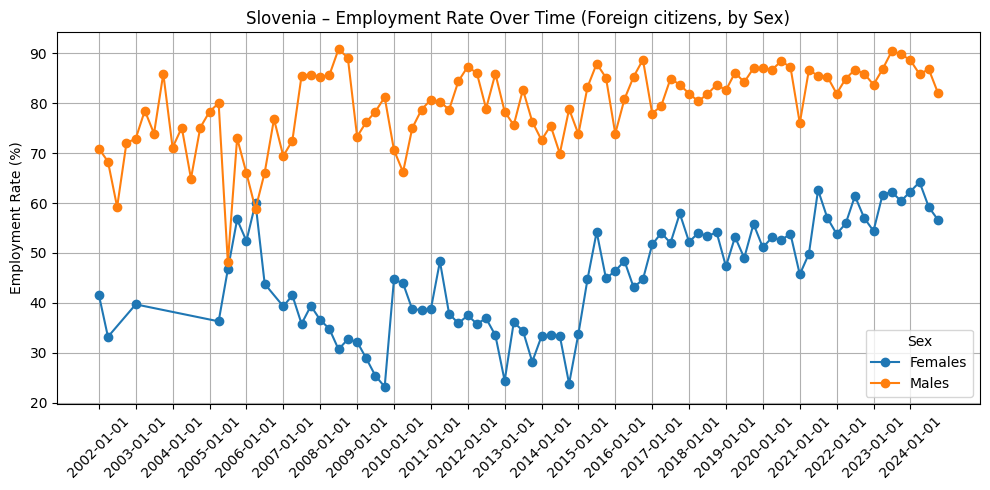

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

selected_countries = ["Poland", "Hungary", "France", "Italy", "Germany", "Sweden", "Spain", "Greece", "Slovenia"]


df = e_rate_df[
    (e_rate_df['geo'].isin(selected_countries)) &
    (e_rate_df['Sex'].isin(['Females', 'Males'])) &
    (e_rate_df['citizenship'] == 'Foreign country')
].copy()

def quarter_to_datetime(q):
    year, qtr = q[:4], q[-1]
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}.get(qtr, '01')
    return pd.to_datetime(f"{year}-{month}-01")

df['quarter_dt'] = df['quarter'].apply(quarter_to_datetime)

for country in selected_countries:
    subset = df[df['geo'] == country].sort_values('quarter_dt')

    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    for sex in ['Females', 'Males']:
        sex_data = subset[subset['Sex'] == sex]
        if not sex_data.empty:
            plt.plot(sex_data['quarter_dt'], sex_data['employment_rate'], marker='o', label=sex)

    plt.title(f"{country} – Employment Rate Over Time (Foreign citizens, by Sex)")
    plt.ylabel("Employment Rate (%)")

    xticks = subset['quarter_dt'].unique()
    plt.xticks(xticks[::4], rotation=45)

    plt.grid(True)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()


# Unemployment rates by sex, age and citizenship

# 